# 폐병 환자 수술 (Thoraric Surgery)

In [2]:
import numpy as np
import pandas as pd

## 1. 데이터 셋 만들기

In [3]:
df = pd.read_csv('dataset/ThoraricSurgery.csv',header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62,0
1,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
2,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1
3,14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
4,17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(  
    df.iloc[:,:-1].values, df.iloc[:,-1].values
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((352, 17), (118, 17), (352,), (118,))

In [5]:
import tensorflow as tf
seed = 2021 # 할때마다 동일한 결과를 내기 위해 seed 값 지정함
np.random.seed(seed)
tf.random.set_seed(seed)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### - 은닉층(hidden layer)을 여러개 둠

In [7]:
model = Sequential()
model.add(Dense(24, input_shape=(17,), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                432       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                250       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 693
Trainable params: 693
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 위와 같은 결과
# input_dim=17 으로 써도 됨 

model = Sequential([
    Dense(24, input_dim=17, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 24)                432       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                250       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 693
Trainable params: 693
Non-trainable params: 0
_________________________________________________________________


## 2. 모델 컴파일 - 실행환경 설정

In [18]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## 3. 모델 학습

In [19]:
history = model.fit(
    X_train, y_train, 
    validation_split= 0.2, #테스트해보는 셋 지정
    epochs= 30, #epochs가 너무 크면 과대적합의 위험이 있다.
    batch_size=30 #한번에 처리할 수 있는 양을 지정
    )

Epoch 1/30
10/10 [==============================] - 0s 17ms/step - loss: 66.9762 - accuracy: 0.1744 - val_loss: 53.5900 - val_accuracy: 0.1690
Epoch 2/30
10/10 [==============================] - 0s 2ms/step - loss: 33.2220 - accuracy: 0.2776 - val_loss: 18.8536 - val_accuracy: 0.3239
Epoch 3/30
10/10 [==============================] - 0s 2ms/step - loss: 6.7032 - accuracy: 0.5765 - val_loss: 2.6176 - val_accuracy: 0.8592
Epoch 4/30
10/10 [==============================] - 0s 2ms/step - loss: 3.9062 - accuracy: 0.8434 - val_loss: 3.5908 - val_accuracy: 0.8732
Epoch 5/30
10/10 [==============================] - 0s 2ms/step - loss: 4.6143 - accuracy: 0.8434 - val_loss: 3.3584 - val_accuracy: 0.8732
Epoch 6/30
10/10 [==============================] - 0s 3ms/step - loss: 3.8853 - accuracy: 0.8434 - val_loss: 2.6340 - val_accuracy: 0.8732
Epoch 7/30
10/10 [==============================] - 0s 2ms/step - loss: 2.5949 - accuracy: 0.8363 - val_loss: 2.3025 - val_accuracy: 0.7324
Epoch 8/30
10/1

## 4. 정확도 평가

In [20]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 749us/step - loss: 0.5252 - accuracy: 0.7966


[0.5251680016517639, 0.7966101765632629]

## 5. 학습과정 시각화

In [21]:
type(history.history)

dict

In [22]:
# 훈련데이터 정확도/ 손실값
accuracy = history.history['accuracy']
loss = history.history['loss']
accuracy[: 3]


[0.1743772178888321, 0.2775800824165344, 0.5765124559402466]

In [23]:
# 검증데이터의 정확도/ 손실값
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']
val_loss[: 3]

[53.59001541137695, 18.853553771972656, 2.617617130279541]

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

<function matplotlib.pyplot.show(close=None, block=None)>

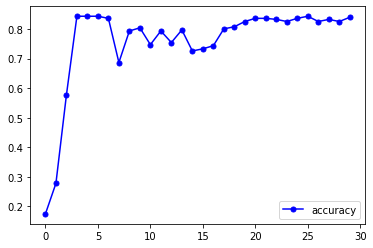

In [29]:
x_len = np.arange(len(accuracy))
plt.figure(figsize =(6,4))
plt.plot(x_len, accuracy, 'bo-', markersize =5, label = 'accuracy')
# plt.plot(x_len(x_len, val_loss, 'ro-'), markersize =5, label = 'val_loss')
plt.legend()
plt.show
# 스케일 달라서 합쳐서 쓸 수 없음 

<function matplotlib.pyplot.show(close=None, block=None)>

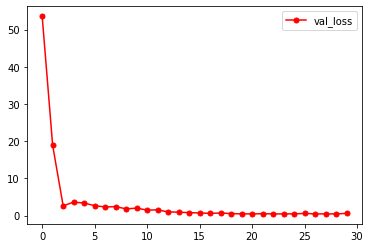

In [32]:
plt.plot(x_len, val_loss, 'ro-', markersize =5, label = 'val_loss')
plt.legend()
plt.show